### Leaky-Integrate-and-Fire (LIF) neuron

A membrane equation and reset condition define the LIF neuron:
$$\tau_m \frac{d}{dt}V(t)=E_L - V(T)+RI(t)$$ if $$V(t)\leq V_{th}$$
$$V(t)=V_{reset}$$ otherwise

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_L$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. We can also write $V_m$ as the membrane potential for more convenient plot labels.

The membrane equation describe the time evolution of membrane potential $V(t)$ in response to synaptic input and leaking of charge across the cell membrane. This is an *ordinary differential equation (ODE)*

#### Contents:
- visualize the evolution of its membrane potential in time
- extract essential statistical properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

First, define and initialize the main simulation variables for LIF neuron by supplemneting the values provided above.

In [2]:
t_max = 15e-2     # second, max step => 15 steps spanned in seconds
dt = 1e-3         # second, derivative of t
tau = 20e-3       # second, membrane time constant
el = -6e-2        # milivolt, leak potential
vr = -7e-2        # milivolt
vth = -5e-2       # milivolt
r = 100e6         # ohm, membrane resistance
i_mean = 25e-11   # ampere, synaptic input

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


Now we need to simulate synaptic input $I(t)$ that goes into our model neuron. We will start with a sinusoidal model to simulate this input using the equation: $$I(t)=I_{mean}(1+sin(\frac{2\pi}{0.01}t))$$
where $I_{mean}$ is the mean current input and $t$ is the time.

Now we will compute the values of synaptic input $I(t)$ between t=0 and t=0.009 with step 0.001

In [3]:
t = np.arange(0, 0.01, 0.001)
i_t = i_mean * (1 + np.sin((2 * np.pi) / 0.01 * t))   # synaptic input
i_t

array([2.50000000e-10, 3.96946313e-10, 4.87764129e-10, 4.87764129e-10,
       3.96946313e-10, 2.50000000e-10, 1.03053687e-10, 1.22358709e-11,
       1.22358709e-11, 1.03053687e-10])

### Plotting current

t=0.000	i=2.5000e-10
t=0.001	i=3.9695e-10
t=0.002	i=4.8776e-10
t=0.003	i=4.8776e-10
t=0.004	i=3.9695e-10
t=0.005	i=2.5000e-10
t=0.006	i=1.0305e-10
t=0.007	i=1.2236e-11
t=0.008	i=1.2236e-11
t=0.009	i=1.0305e-10
t=0.010	i=2.5000e-10
t=0.011	i=3.9695e-10
t=0.012	i=4.8776e-10
t=0.013	i=4.8776e-10
t=0.014	i=3.9695e-10
t=0.015	i=2.5000e-10
t=0.016	i=1.0305e-10
t=0.017	i=1.2236e-11
t=0.018	i=1.2236e-11
t=0.019	i=1.0305e-10
t=0.020	i=2.5000e-10
t=0.021	i=3.9695e-10
t=0.022	i=4.8776e-10
t=0.023	i=4.8776e-10
t=0.024	i=3.9695e-10


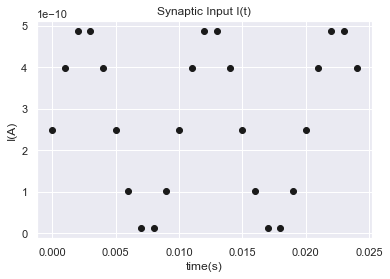

In [4]:
# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('time(s)')
plt.ylabel('I(A)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Print values of t and i
  print(f't={t:.3f}\ti={i:.4e}')

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i,  marker='o', color='k')

# Display the plot
plt.show()

### Plotting membrane potential

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$. We can compute the numbers of steps required to get to $t=t_{max}$ given step as $int(t_{max}/dt)$ where int gets the nearest integer

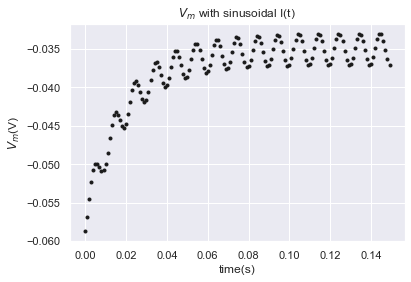

In [5]:
step_end = int(t_max / dt)

# initialize v0
v = el

plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time(s)')
plt.ylabel('$V_m$(V)')

# loop for step_ends steps
for step in range(step_end):
  # compute t
  t = step * dt

  # compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # compute v
  v += dt / tau * (el - v + r * i)

  plt.plot(t, v, 'k.')

plt.show()

In the next exercises, we will simulate the evolution of the membrane equation in discrete time steps, with a sufficiently small Δt.

We start by writing the time derivative $\frac{d}{dt}V(t)$ in the membrane equation without taking the limit Δt→0:

τmV(t+Δt)−V(t)Δt=EL−V(t)+RI(t)

The value of membrane potential V(t+Δt) can be expressed in terms of its previous value V(t) by simple algebraic manipulation. For small enough values of Δt, this provides a good approximation of the continuous-time integration.

This operation is an integration since we obtain a sequence {V(t),V(t+Δt),V(t+2Δt),...} starting from the ODE. Notice how the ODE describes the evolution of ddtV(t), the derivative of V(t), but not directly the evolution of V(t). For the evolution of V(t) we need to integrate the ODE, and in this tutorial, we will do a discrete-time integration using the Euler method. See Numerical methods for ordinary differential equations for additional details.

### Coding Exercise 4: Simulating membrane potential
Compute the values of V(t) between t=0 and t=0.01 with step Δt=0.001 and V(0)=EL.

We need to reorganize the Eq. (1) to isolate V(t+Δt) on the left side, and express it as function of V(t) and the other terms: V(t+Δt)=V(t)+Δtτm(El−V(t)+RI(t))

In [6]:
# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + (dt / tau) * (el - v + r * i)

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


### Coding Exercise 5: Plotting current

In this exercise, we will plot the values of I(t) between t=0 and t=0.024.

You will first need to set the title and axis labels of the plot. Label these descriptively! You will then need to fill out the code to actually create the plot.

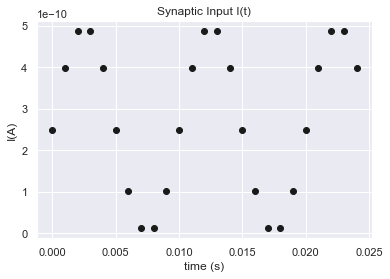

In [7]:
# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('time (s)')
plt.ylabel('I(A)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'ko')

# Display the plot
plt.show()

### Coding Exercise 6: Plotting membrane potential

Plot the values of V(t) between t=0 and t=tmax. We can compute the number of steps required to get to t=tmax given Δt as int(t_max/dt) where int gets the nearest integer.

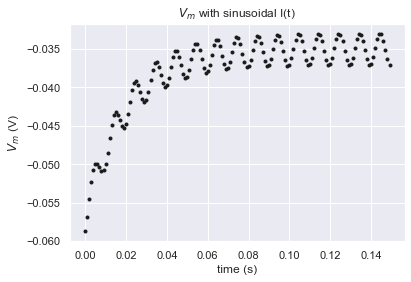

In [8]:
# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')

# Display plot
plt.show()

## Random synaptic input

From the perspective of neurons, synaptic input is random (=stochastic). We'll improve the synaptic input model by introducing random input current with statistica properties similar to the previous exercise:

$$I(t)=I_{mean}(1+0.1\sqrt{\frac{t_{max}}{\delta{t}}}\xi{t} )$$
with $\xi{t}~U(-1,1)$

$\xi$ = xi & U(t) is the uniform distribution with support $x \in [-1, 1]$

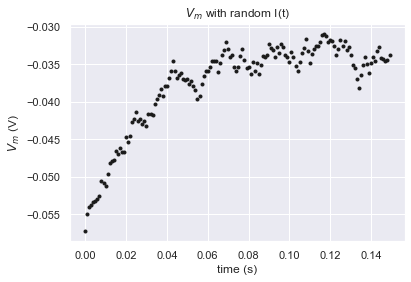

In [9]:
# set random number generator
np.random.seed(2020)

# initialize step_end and v
step_end = int(t_max / dt)
v = el

# initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  # compute value of t
  t = step * dt

  # get random number
  random_num = 2 * np.random.random() - 1

  # compute value of i at this time step
  i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * random_num)

  # compute v
  v = v + dt / tau * (el - v + r * i)

  # plot v (using k. to get even smaller markers)
  plt.plot(t, v, 'k.')

plt.show()

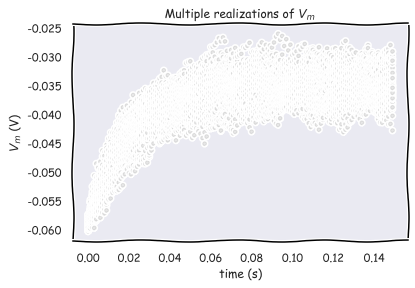

In [19]:
# Set random number generator
# np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt) ** 0.5 * (2 * np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + dt / tau * (el - v_n[j] + r * i)

    # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
    plt.plot([t] * 50, v_n, 'k.', alpha=0.1)

  # Display plot
  plt.show()

Add the sample mean ⟨V(t)⟩=1N∑Nn=1Vn(t) to the plot.

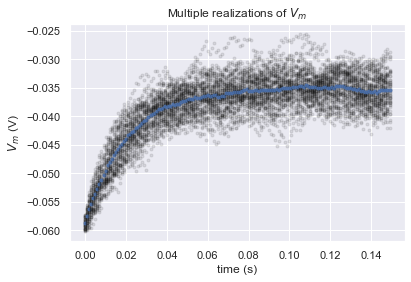

In [20]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Loop for n simulations
  for j in range(0, n):

    # Compute value of i at this time step
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

    # Compute value of v for this simulation
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

  # Compute sample mean by summing list of v_n using sum, and dividing by n
  v_mean = 1/n * np.sum(v_n)

  # Plot simulations
  plt.plot(n*[t], v_n, 'k.', alpha=0.1)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
  plt.plot(t, v_mean, 'C0.', alpha=0.8)

# Display plot
plt.show()